# Understanding Cumulative Distribution Functions (CDF) and Their Empirical Estimation

## Introduction to CDFs

Before diving into empirical distributions, it's essential to understand what a cumulative distribution function represents and why it's useful in statistical analysis. A CDF helps us understand the complete probability distribution of a random variable by showing the probability of the variable being less than or equal to any given value.

## CDF Definition and Intuition

The CDF $F_X(x)$ of a random variable $X$ gives the probability that $X$ is less than or equal to $x$:

$F_X(x) = P(X \leq x)$

To build intuition:
- If we're measuring heights in a population, $F_X(170)$ would tell us the proportion of people who are 170 cm or shorter
- For test scores, $F_X(80)$ would represent the fraction of students scoring 80 or below
- In reliability analysis, $F_X(t)$ might represent the probability of a component failing by time $t$

## CDF for Discrete Random Variables

For a discrete random variable $X$ with probability mass function (PMF) $p_X(x)$, the CDF is the cumulative sum of the probabilities up to $x$:

$F_X(x) = \sum_{x_i \leq x} p_X(x_i)$

### Example: Rolling a Die
Consider rolling a fair six-sided die:
- $P(X \leq 3) = P(X = 1) + P(X = 2) + P(X = 3) = \frac{1}{6} + \frac{1}{6} + \frac{1}{6} = \frac{1}{2}$
- The CDF would jump by $\frac{1}{6}$ at each value from 1 to 6

## CDF for Continuous Random Variables

For a continuous random variable $X$ with probability density function (PDF) $f_X(x)$, the CDF is the integral of the PDF from $-\infty$ to $x$:

$F_X(x) = \int_{-\infty}^{x} f_X(t) \, dt$

### Example: Normal Distribution
For a standard normal distribution:
- The CDF at $x = 0$ is 0.5, meaning 50% of the data lies below zero
- The CDF at $x = 1$ is approximately 0.84, indicating about 84% of the data lies below 1

## Properties of CDF

The CDF has several important properties that make it useful for statistical analysis:

1. **Non-decreasing**:
   - The CDF is always non-decreasing: $F_X(x) \leq F_X(y)$ for $x \leq y$
   - This makes intuitive sense as accumulating probabilities can't decrease

2. **Limits**:
   - $\lim_{x \to -\infty} F_X(x) = 0$: The probability of getting an infinitely small value is zero
   - $\lim_{x \to \infty} F_X(x) = 1$: The probability of getting any value is 1 (certainty)

3. **Right-continuity**: 
   - $\lim_{\epsilon \to 0^+} F_X(x + \epsilon) = F_X(x)$
   - This ensures smooth behavior when approaching values from the right
   - Particularly important for discrete distributions where jumps occur

4. **Range**: 
   - $0 \leq F_X(x) \leq 1$ for all $x$
   - This follows from the basic properties of probability

## Empirical CDF (ECDF)

The empirical CDF is a practical tool for estimating the true CDF when we only have sample data. Given a sample $X_1, X_2, \dots, X_n$, the ECDF $\hat{F}_n(x)$ is defined as:

$\hat{F}_n(x) = \frac{1}{n} \sum_{i=1}^{n} \mathbb{I}(X_i \leq x)$

Where:
- $\mathbb{I}(X_i \leq x)$ is the indicator function
- $n$ is the sample size
- $\hat{F}_n(x)$ represents the proportion of data points ≤ $x$

### Example: Computing ECDF
For the dataset {1, 2, 2, 3, 4, 4, 5}:
- $\hat{F}_n(2) = \frac{3}{7}$ (3 values ≤ 2)
- $\hat{F}_n(4) = \frac{6}{7}$ (6 values ≤ 4)
- The function jumps by $\frac{1}{7}$ at each unique value

## Practical Applications of ECDF

1. **Non-parametric Estimation**
   - Provides distribution estimates without assuming a specific form
   - Useful when the underlying distribution is unknown
   - More robust than parametric methods

2. **Goodness-of-fit Testing**
   - Kolmogorov-Smirnov test compares ECDF to theoretical CDF
   - Helps validate distribution assumptions
   - Example: Testing if data follows a normal distribution

3. **Quantile Estimation**
   - Find sample percentiles directly from ECDF
   - Median: Value where ECDF = 0.5
   - Quartiles: Values where ECDF = 0.25, 0.75

4. **Anomaly Detection**
   - Identify outliers using ECDF percentiles
   - Points in extreme tails (e.g., ECDF > 0.99) might be anomalies
   - More robust than parametric methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
np.random.seed(47)

In [2]:
# Generate data
mean = 0
std = 2
sample_size = 500
sample = np.random.normal(loc=mean, scale=std, size=sample_size)

In [3]:
# Define support range (empirical)
support = (min(sample) - 0.5, max(sample) + 0.5)

# Number of points to calculate the relative frequency for
num_points = 20
points = np.linspace(support[0], support[1], num_points)

# Calculate relative frequencies
cumulative_reqlative_frequencies = []
for point in points:
    cumulative_reqlative_frequencies.append(
        (sample <= point).sum() / sample_size
    ) 

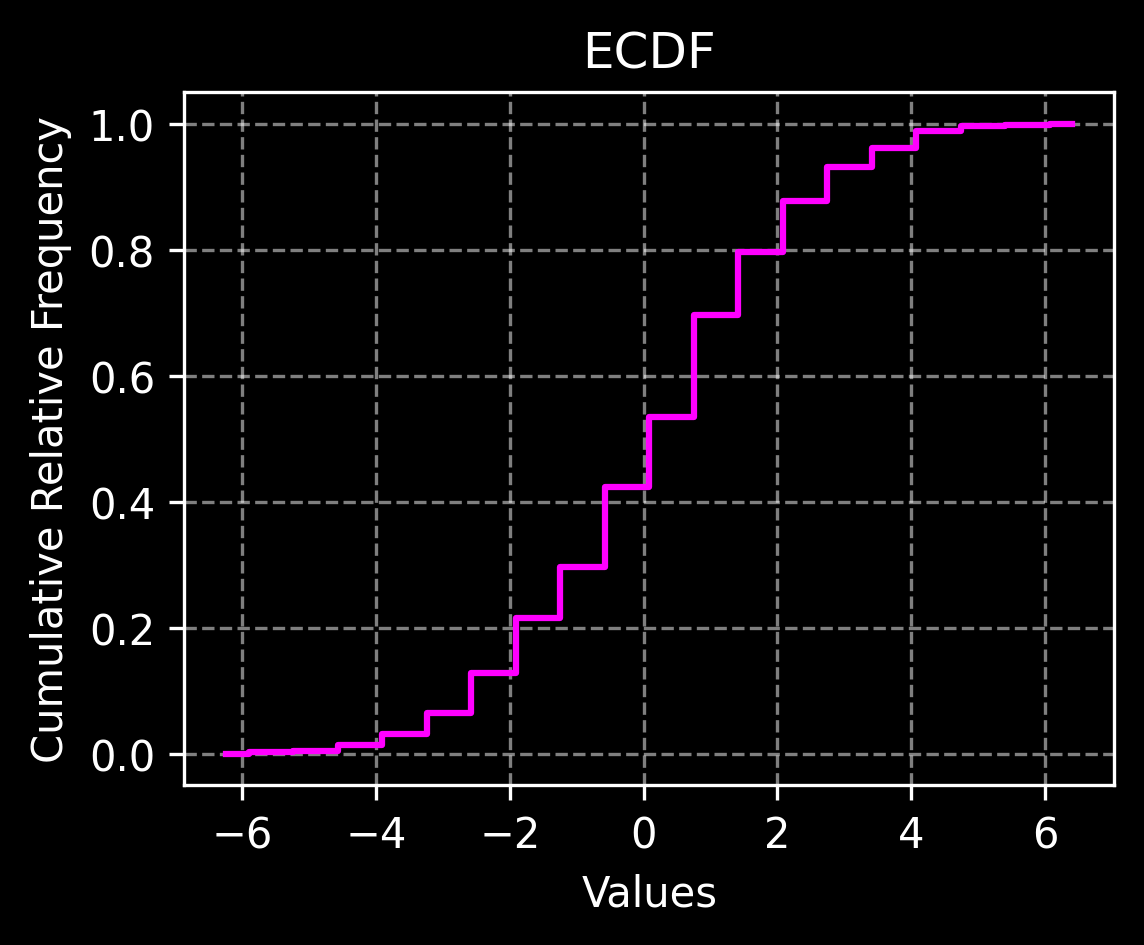

In [4]:
# Plot the cumulative relative frequencies vs points
plt.figure(figsize=(4, 3), dpi=300)
plt.step(points, cumulative_reqlative_frequencies, 
         where='mid', color='magenta')
plt.xlabel('Values')
plt.ylabel('Cumulative Relative Frequency')
plt.title('ECDF')
plt.grid(True, alpha=0.5, linestyle='--')
plt.show()